In [1]:
from infrastructure.dataclasses import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameteres=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=2,
        number_of_hidden_layers=2,
        n_blocks=4
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=500,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 500, Loss: -8.234, LR: 0.000000: 100%|██████████| 500/500 [02:34<00:00,  3.24it/s]


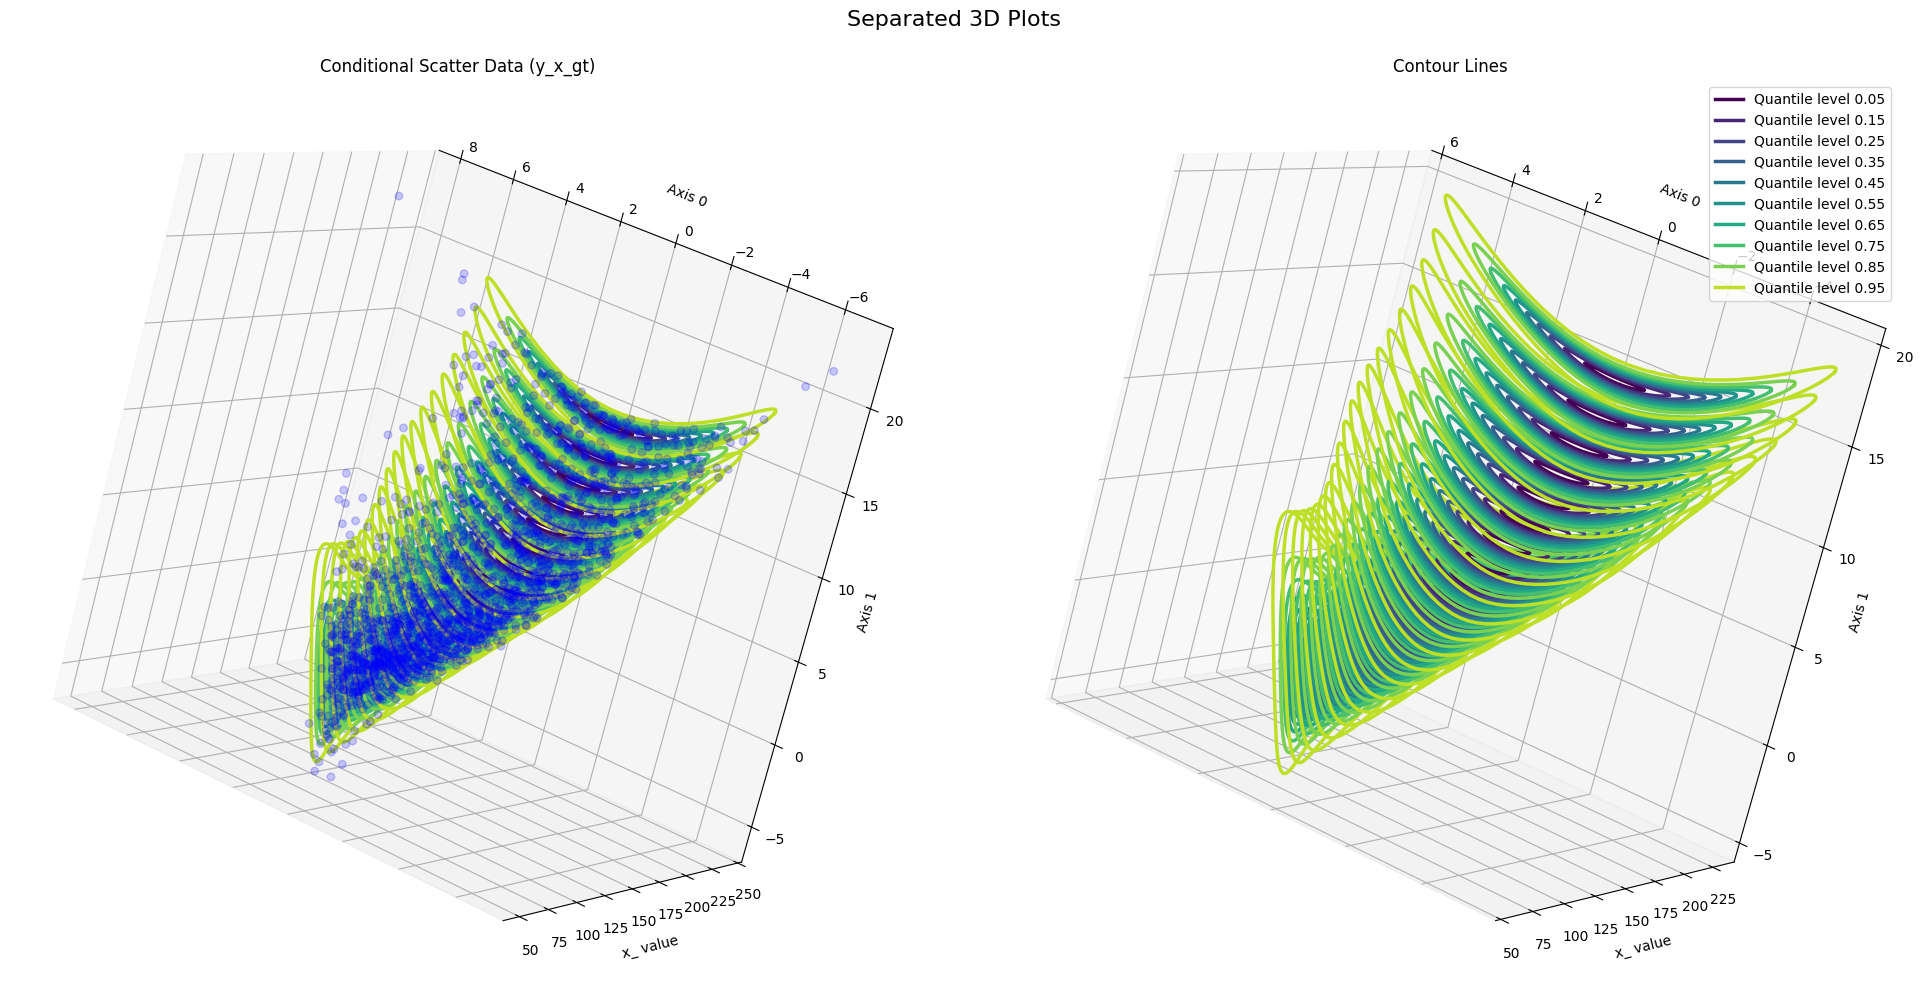

In [3]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(
    model=model, device_and_dtype_specifications=experiment.tensor_parameteres
)